What we want to do here is to do a plotting of the Stripe82 region.
For such, we need to
1. define the sky coordinates of the Stripe
  * coordinates for the Stripe to use are the ines defines at 'http://classic.sdss.org/legacy/stripe82.html'
2. prepare a canvas in a proper projection for the sky
  * in astronomy people seem to use the 'mollweide' projection. I prefer the 'hammer' projection
3. draw our points --actually, it should be rectangular region (i.e, a stripe)-- over the projection

In [102]:
# Sky coordinates (limits) for stripe82
ra_deg = [-50,59]
dec_deg = [-1.25,1.25]

# Let's define the limits for our plot also
#ra_lim = [-90,90]
#dec_lim = [-3,3]

Define limits with Matplotlib's projection mode is useless. That's the lines are commented. 

In [103]:
# Matplotlib expects the coordinates to be in radians
# Astropy can help us on the convertion from degrees to radians
import astropy.coordinates as coord
import astropy.units as u

ra = coord.Angle(ra_deg*u.degree)
rasize = ra[1].radian-ra[0].radian
#ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(dec_deg*u.degree)
decsize = dec[1].radian-dec[0].radian

# The limits...
#ral = coord.Angle(ra_lim*u.degree)
#decl = coord.Angle(dec_lim*u.degree)

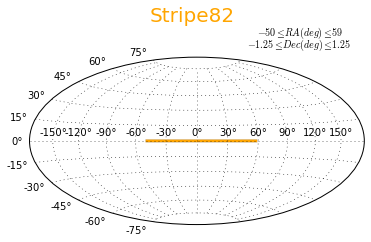

In [104]:
import matplotlib.patches as mpatches
s82 = mpatches.Rectangle([ra[0].radian, dec[0].radian], rasize, decsize, facecolor='orange', linewidth=0.1)

# Open up the canvas for plotting
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Stripe82', color='orange', fontsize=20)
s82_subtitle1 = r'$-50\leq RA(deg)\leq 59$'
fig.text(0.75,0.88, s82_subtitle1 ,ha='center',fontsize=10)
s82_subtitle2 = '$-1.25\leq Dec(deg)\leq 1.25$'
fig.text(0.75,0.84, s82_subtitle2 ,ha='center',fontsize=10)
ax = fig.add_subplot(111,projection='hammer')
ax.grid(True)

#ax.set_xlim(ral.radian)
#ax.set_ylim(decl.radian)

# Now, let's put them on the sky
#ax.scatter(ra.radian,dec.radian)
ax.add_patch(s82)

In [105]:
fig.savefig('pynote_skyplot_s82_matplotlib.svg')